In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
from sklearn import preprocessing
a= df[['Hardness']].values.astype(float)
a
min_max_scaler =preprocessing.MinMaxScaler()

a_scaled = min_max_scaler.fit_transform(a)

a_scaled

df['Hardness'] = a_scaled


In [ ]:
b= df[['Solids']].values.astype(float)
b
min_max_scaler =preprocessing.MinMaxScaler()

b_scaled = min_max_scaler.fit_transform(b)

b_scaled

df['Solids'] = b_scaled
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,0.571139,0.336096,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,0.297400,0.300611,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,0.641311,0.321619,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,0.605536,0.356244,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,0.484851,0.289922,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,0.530482,0.775947,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,0.530016,0.279263,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,0.465486,0.539101,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,0.664407,0.191490,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
c= df[['Sulfate']].values.astype(float)
c
min_max_scaler =preprocessing.MinMaxScaler()

c_scaled = min_max_scaler.fit_transform(c)

c_scaled

df['Sulfate'] = c_scaled


In [ ]:
d= df[['Conductivity']].values.astype(float)
d
min_max_scaler =preprocessing.MinMaxScaler()

d_scaled = min_max_scaler.fit_transform(d)

d_scaled

df['Conductivity'] = d_scaled
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,0.571139,0.336096,7.300212,0.680385,0.669439,10.379783,86.990970,2.963135,0
1,3.716080,0.297400,0.300611,6.635246,NaN,0.719411,15.180013,56.329076,4.500656,0
2,8.099124,0.641311,0.321619,9.275884,NaN,0.414652,16.868637,66.420093,3.055934,0
3,8.316766,0.605536,0.356244,8.059332,0.647347,0.317880,18.436524,100.341674,4.628771,0
4,9.092223,0.484851,0.289922,6.546600,0.514545,0.379337,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,0.530482,0.775947,7.166639,0.656047,0.603192,13.894419,66.687695,4.435821,1
3272,7.808856,0.530016,0.279263,8.061362,NaN,0.368912,19.903225,NaN,2.798243,1
3273,9.419510,0.465486,0.539101,7.350233,NaN,0.438152,11.039070,69.845400,3.298875,1
3274,5.126763,0.664407,0.191490,6.303357,NaN,0.387157,11.168946,77.488213,4.708658,1


In [ ]:
df = df.fillna(df.mean())
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,0.571139,0.336096,7.300212,0.680385,0.669439,10.379783,86.990970,2.963135,0
1,3.716080,0.297400,0.300611,6.635246,0.581699,0.719411,15.180013,56.329076,4.500656,0
2,8.099124,0.641311,0.321619,9.275884,0.581699,0.414652,16.868637,66.420093,3.055934,0
3,8.316766,0.605536,0.356244,8.059332,0.647347,0.317880,18.436524,100.341674,4.628771,0
4,9.092223,0.484851,0.289922,6.546600,0.514545,0.379337,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,0.530482,0.775947,7.166639,0.656047,0.603192,13.894419,66.687695,4.435821,1
3272,7.808856,0.530016,0.279263,8.061362,0.581699,0.368912,19.903225,66.396293,2.798243,1
3273,9.419510,0.465486,0.539101,7.350233,0.581699,0.438152,11.039070,69.845400,3.298875,1
3274,5.126763,0.664407,0.191490,6.303357,0.581699,0.387157,11.168946,77.488213,4.708658,1


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 69.05%
Confusion Matrix:
[[361  51]
 [152  92]]


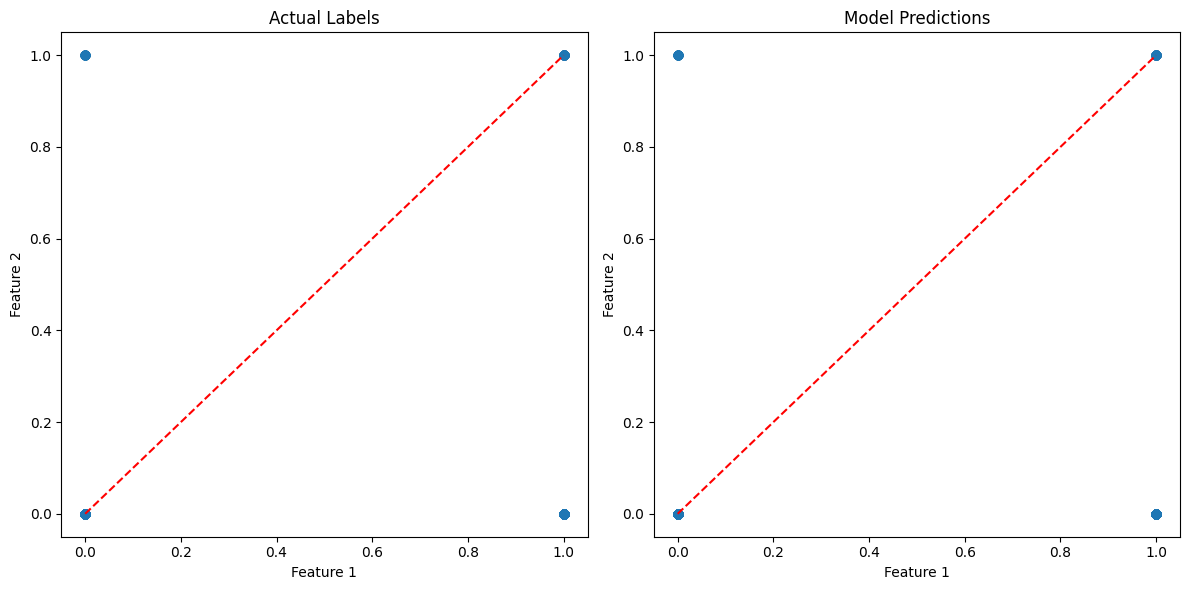

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot to visualize the test data and predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test,y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(y_test,y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Model Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')



plt.tight_layout()
plt.show()